In [30]:
import nasapy
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [31]:
# Extract the last 10 years of fireball data as a pandas DataFrame (up to the day this code was written)
fb = nasapy.fireballs(date_min='2015-01-01', date_max='2025-12-15', return_df=True)

In [32]:
# Data cleanup

# Remove duplicate records
fb.dropna(inplace=True)

# Convert data points to float
fb['lat'] = fb['lat'].astype(float)
fb['lon'] = fb['lon'].astype(float)
fb['energy'] = fb['energy'].astype(float)

In [38]:
# Inspect first 5 data rows
fb.head()

,date,energy,impact-e,lat,lat-dir,lon,lon-dir,alt,vel,datetime
145,2018-12-18,3130.0,49,56.9,N,172.4,E,26.0,13.6,2018-12-18 23:48:18
47,2016-02-06,685.0,13,30.4,S,25.5,W,31.0,15.6,2016-02-06 13:55:09
227,2020-12-22,667.0,12,31.9,N,96.2,E,35.5,13.6,2020-12-22 23:23:28
104,2017-12-15,400.0,7.9,60.2,N,170.0,E,20.0,31.4,2017-12-15 13:14:37
321,2023-05-20,351.0,7.1,17.8,S,141.9,E,29.0,27.9,2023-05-20 11:22:22


In [37]:
# Data plotting

# Create a map of the data
map = folium.Map(zoom_start=4)

for i in range(0, len(fb)):
    folium.Circle(
        location=[fb.iloc[i]['lat'], fb.iloc[i]['lon']],
        tooltip=['Date: ' + fb.iloc[i]['date'],
                 '\nLat/Lon: ' + str(fb.iloc[i]['lat']) + ', ' +
                 str(fb.iloc[i]['lon'])],
        radius=fb.iloc[i]['energy'] * 10,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(map)

# Show map
map

C:\Users\noora\AppData\Local\Temp\ipykernel_17188\150747930.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p = p.set_xticklabels(fb['date'], rotation=45, ha='right')


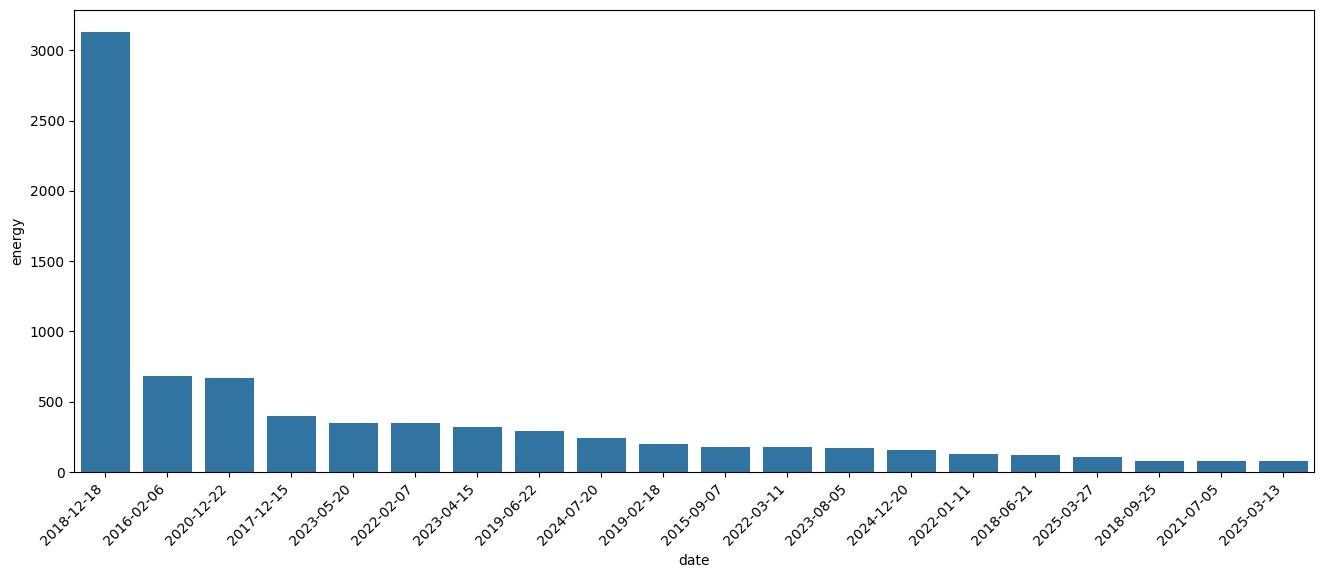

In [40]:
# Plotting energy values

# Extract data and prepare for plotting
fb['datetime'] = fb['date']
fb['date'] = fb['datetime'].apply(lambda x: x.split(' ')[0])

fb.sort_values('energy', ascending=False, inplace=True)

# Plot graph
plt.figure(figsize=(16, 6))
p = sns.barplot(x='date', y='energy', data=fb[0:20])
p = p.set_xticklabels(fb['date'], rotation=45, ha='right')

In [36]:
# Cut out the outlier fireball out of the day (the highest energy data point) 

fb2 = fb[fb['energy'] < 3000]

# Remake the map
map = folium.Map(zoom_start=4)

for i in range(0, len(fb)):
    folium.Circle(
        location=[fb.iloc[i]['lat'], fb.iloc[i]['lon']],
        tooltip=['Date: ' + fb.iloc[i]['date'],
                 '\nLat/Lon: ' + str(fb.iloc[i]['lat']) + ', ' +
                 str(fb.iloc[i]['lon'])],
        radius=fb.iloc[i]['energy'] * 10,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(map)

map